# **데이터 시각화**

## 1. 어떤 Feature를 대상으로 시각화를 진행해야할까?

당연한 이야기지만, '결과'에 관련이 있는 Feature를 대상으로 분석 후에,<br>
해당 그래프에서 가장 최적화된 머신러닝 알고리즘을 사용.
<br>
예
<br>
 * 선형회귀
 * 로지스틱회귀
 * 의사결정나무
 * DNN
 * 등..
<br>

## 2. 데이터의 Feature 목록

* PassengerId         : 승객의 ID.
* Survival            : 핵심 데이터. (살았다, 죽었다) 즉 0, 1 의 데이터가 존재.
* Pclass              : 등실의 등급
* Name                : 승객의 이름
* Sex                 : 성별
* Age                 : 나이
* Sibsp               : 함께 탑승한 형제자매, 아내, 남편의 수
* Parch               : 함께 탑승한 부모, 자식의 수
* Ticket              : 티켓번호
* Fare                : 티켓의 요금
* Cabin               : 객실번호 
* Embarked            : 배에 탑승한 위치 (C = Cherbourg, Q = Queenstown, S = Southampton)


### 참고. Embarked에 대하여

처음에는 승객이 배에 타고 있는 위치를 이야기하는 줄 알았는데, 어느 지역에서 탔는지에 대한 내용이었습니다.

Cherbourg     : 셰르부르옥트빌 (프랑스 북부 바스노르망디 지방에 있는 항구도시)

Queenstown    : 뉴질랜드 남섬의 도시

Southampton   : 영국의 사우스햄튼 (사우스햄튼 FC 프로 축구팀의 연고지로도 유명하다.)

### 3. 결과적으로 제가 의미있을 거란 생각한 Feature

* Survival    : 이건 꼭 필요하기 때문!
* Pclass      : 등실의 등급이 올라갈 수록 티켓 값은 비싸집니다! 그러면 부유한 사람이 먼저 살아남지 않았을까요?
* Sex         : 아무래도 태평양 한 가운데서 바다 수영을 하기 위해선 기본적인 체력이 어느정도 있는 남자가 더 많이 살아남지 않았을까요?
* Age         : 나이가 어릴수록 팔팔(?) 합니다! 나이가 어린 사람이 살아남지 않았을까요?
* Fare        : Pclass와 같은 이유입니다! 부유한 사람이 많이 살아남지 않았을까요?

나머지 Sibsp, Parch도 충분히 관련이 있다고 생각했습니다. (부모님이 자식을 구하고 사망 등의 시나리오를 생각해 볼 수 있었습니다.) 하지만 위의 데이터를 Survival 과 비교해본 뒤에, 다시 비교해보기로 하였습니다.


# 1. 2D 그래프로 보기 (Survival과 비교)

## 필요한 모듈 Import 하기

In [1]:
import pandas as pd

## 클라우드 마운트하기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [171]:
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

## Survival과 Pclass (부유함과 생존은 상관관계가 존재하는가?)

### 1. 산점도로 확인

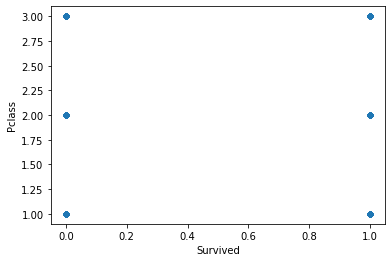

In [ ]:
train.plot(x = 'Survived', y = 'Pclass', kind = 'scatter')

확인 결과 부유함과 생존은 큰 상관관계가 존재하지 않았습니다. 모두 고르게 분포(고르게 분포되어 있는지 확인할 수 없는 그래프이긴 하지만) 하고 있었습니다.

## Survival과 Sex (성별과 생존은 상관관계가 존재하는가?)

### 1. 산점도로 확인

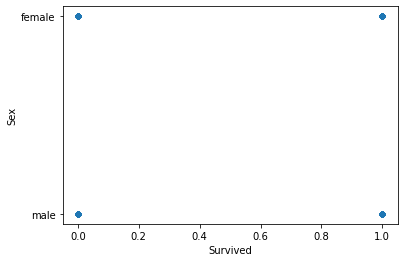

In [ ]:
train.plot(x = 'Survived', y = 'Sex', kind = 'scatter')

## Survival과 Age (나이와 생존은 상관관계가 존재하는가?)

### 1. 산점도로 확인

In [ ]:
train.plot(x = 'Age', y = 'Survived', kind = 'scatter')

NameError: ignored

## Survival과 Fare (부유함과 생존은 상관관계가 존재하는가?)

### 1. 산점도로 확인

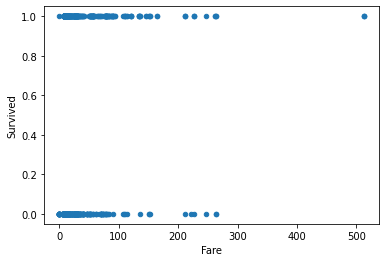

In [ ]:
train.plot(x = 'Fare', y = 'Survived', kind = 'scatter')

확인 결과 부유함과 관련없이 넓게 사망자와 생존자가 분류되는 모습을 확인할 수 있습니다.

## Survival과 승객 ID

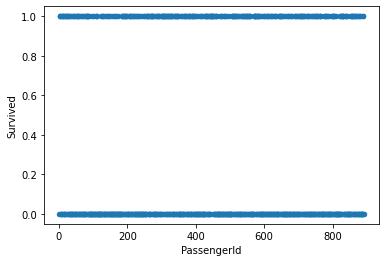

In [ ]:
train.plot(x = 'PassengerId', y = 'Survived', kind = 'scatter')

## 실험 결과 
기존에 있던 데이터를 그대로 사용하여 분석하는 방향으로는 제대로 된 분석이 불가능합니다. 따라서 우리는 가지고 있는 데이터를 가공하여 정보, 나이가서 인텔리전스로 바꿔나가는 방향을 추구해야합니다.

# 데이터 가공해보기

## 1. 어떻게 가공할 것인가?

### 가설 1.
살아남은 집단과 살아남지 못한 집단을 구분.
그리고 아까 했듯이 비율을 따져서 비교.

nan
0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64


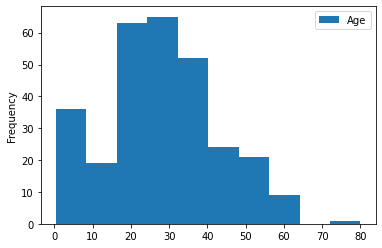

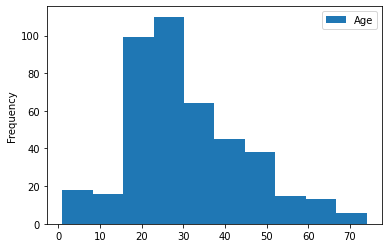

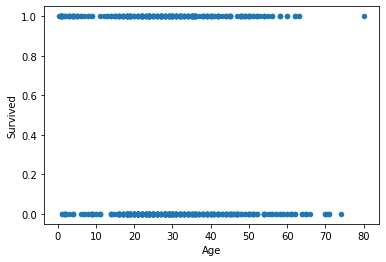

In [ ]:
is_survived_people = train['Survived'] == 1
is_unsurvived_people = train['Survived'] == 0
 
survived_people = train[is_survived_people]
unsurvived_people = train[is_unsurvived_people]

surv_age = survived_people['Age']
unsurv_age = unsurvived_people['Age']


survived_people.plot(x = 'Survived',y = 'Age' ,kind = 'hist')

age_temp = 0

for i in surv_age:
  if i == 'NaN' or i == 'nan':
    pass
  else:
    age_temp += i

print(age_temp / len(surv_age))

unsurvived_people.plot(x = 'Survived', y = 'Age', kind = 'hist')
print(unsurv_age)

train.plot(x='Age', y='Survived', kind='scatter')

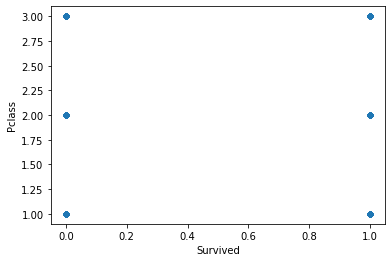

In [ ]:
train.plot(x = 'Survived', y = 'Pclass', kind = 'scatter')

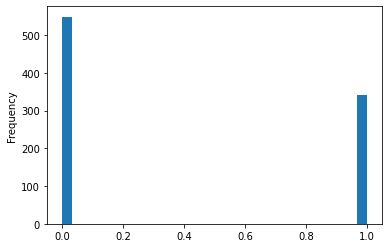

In [ ]:
train['Survived'].plot(y = 'Age',kind = 'hist', bins=30)

# grouby 로 전체적인 분석

In [ ]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


살아남은 사람들의 평균적인 Fare가 높고, Age는 어리며 Pclass(좌석 등급) 또한 1등석에 가까운 것을 알 수 있음.

즉, 주요 Feature는 Pclass, Age, SibSp, Fare이고,

그 중에 Fare와 Age가 가장 차이가 크므로 핵심 Feature라고 짐작할 수 있다.

# 두 번째 시도

## seaborns 활용

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

## 티켓 값과 나이에 따른 생존 관계 분석

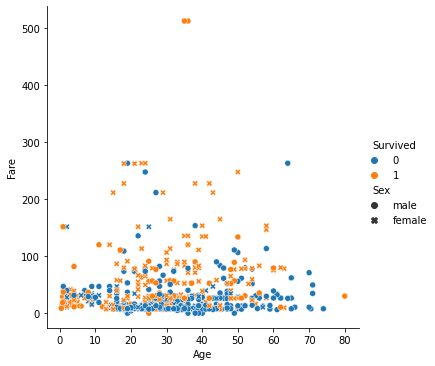

In [32]:
sns.relplot(x="Age", y="Fare", hue="Survived", style="Sex", data=train)
#plt.ylim(0, 250) # Fare가 500 이상인 사람 때문에 결과를 제대로 확인할 수 없음
plt.show()

## 좌석 등급에 따른 사망자와 생존자의 차이

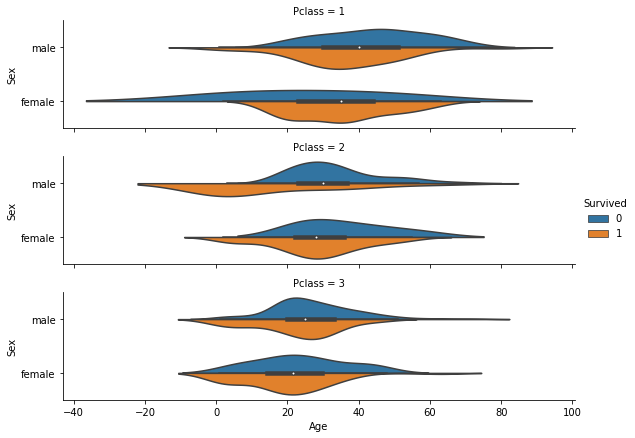

In [28]:
data = train
sns.catplot(x="Age", y="Sex", hue="Survived", row="Pclass", data=data,
            kind="violin", split=True, height=2, aspect=4)

## 가나다

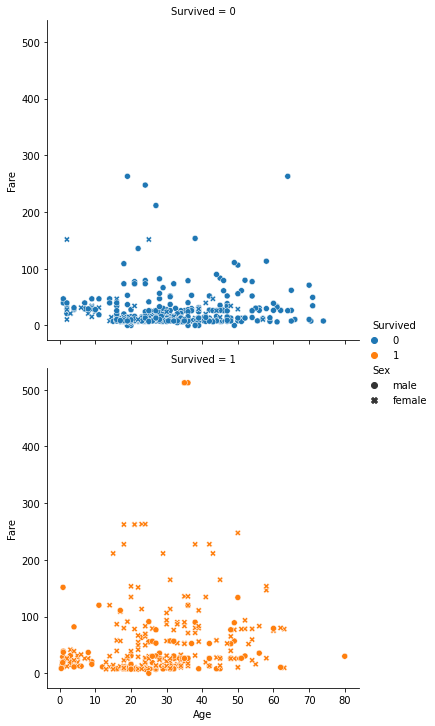

In [67]:
#train.set_index('Sex').T.plot(kind='bar', stacked=True)

# 0. 10대, 20대, 30대, 40대, 50대, 60대, 70대, 80 대에 몇명이 있는지 확인한다.
Age_list = [80, 70, 60, 50, 40, 30, 20, 10]

for age in Age_list:
  train.loc[(train.Age / age == age / 10), 'Age'] = age

# 생존 여부와 나이, 티켓값
sns.relplot(x="Age", y="Fare", hue="Survived", style="Sex", data=train, row="Survived")
#plt.ylim(0, 250) # Fare가 500 이상인 사람 때문에 결과를 제대로 확인할 수 없음
plt.show()
# 1. 전체 인원 수를 구한다.

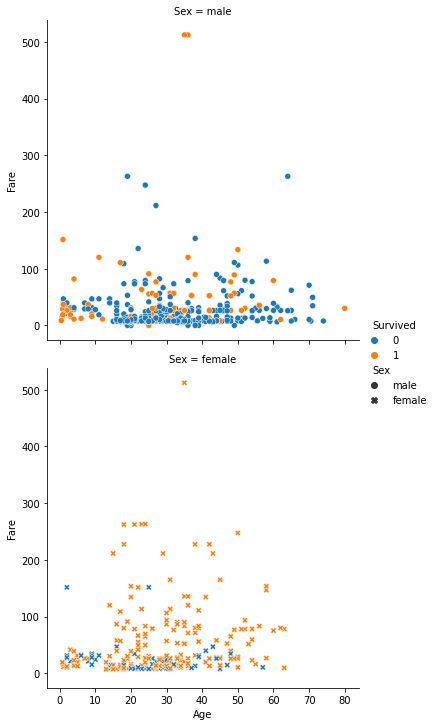

In [68]:
sns.relplot(x="Age", y="Fare", hue="Survived", style="Sex", data=train, row="Sex")
#plt.ylim(0, 250) # Fare가 500 이상인 사람 때문에 결과를 제대로 확인할 수 없음
plt.show()

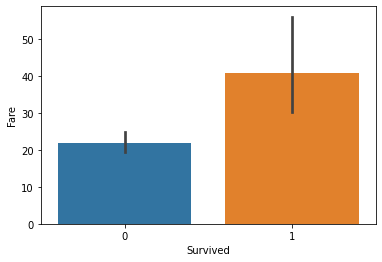

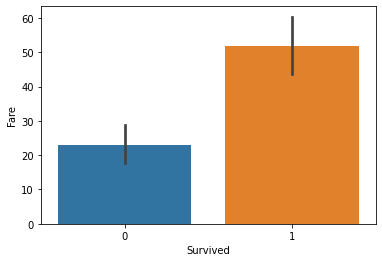

In [87]:
is_Male_list = train['Sex'] == 'male'
is_Female_list = train['Sex'] == 'female'

Male_list = train[is_Male_list]
Female_list = train[is_Female_list]

sns.barplot(x = "Survived", y ="Fare", data=Male_list)
#plt.ylim(0, 250) # Fare가 500 이상인 사람 때문에 결과를 제대로 확인할 수 없음
plt.show()

sns.barplot(x = "Survived", y ="Fare", data=Female_list)
#plt.ylim(0, 250) # Fare가 500 이상인 사람 때문에 결과를 제대로 확인할 수 없음
plt.show()

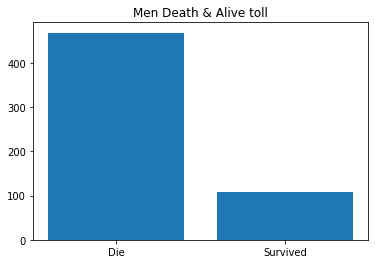

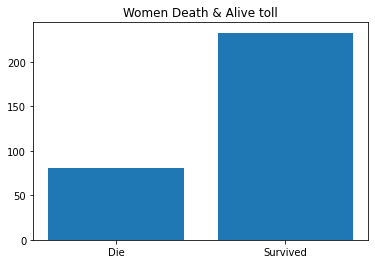

In [99]:
import numpy as np

is_men_suv = Male_list['Survived'] == 1
is_women_suv = Female_list['Survived'] == 1

men_suv = Male_list[is_men_suv]

isn_men_suv = [not elem for elem in is_men_suv]
men_die = Male_list[isn_men_suv]

women_suv = Female_list[is_women_suv]
isn_women_suv = [not elem for elem in is_women_suv]
women_die = Female_list[isn_women_suv]

# men
x = np.arange(2)
plt.title("Men Death & Alive toll")
plt.bar(x, [len(men_die), len(men_suv)])
plt.xticks(x, ['Die', 'Survived'])
plt.show()

# women
x = np.arange(2)
plt.title("Women Death & Alive toll")
plt.bar(x, [len(women_die), len(women_suv)])
plt.xticks(x, ['Die', 'Survived'])
plt.show()

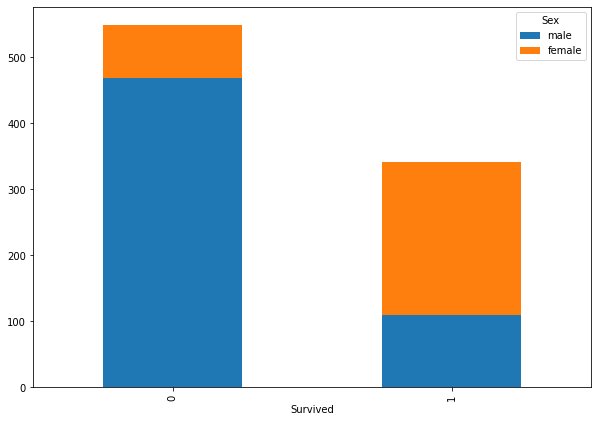

In [175]:
one_list = [1 for i in range(len(train))]
#print( train[['Survived']].transpose() )
men_women_data = [ sum (train[['Survived']].values.tolist(), []), 
                  sum (train[['Sex']].values.tolist(), []), 
                  one_list
]

#print(men_women_data[0])

rows = zip(men_women_data[0], men_women_data[1], men_women_data[2])
#for i in rows:
#  print(i)

headers = ['Survived', 'Sex', 'Value']

df = pd.DataFrame(list(rows), columns=headers)

df.dropna(axis=0)

pivot_df = df.pivot_table(index='Survived', columns='Sex', values='Value', aggfunc=np.sum )
pivot_df = pivot_df[['male','female']].copy()
pivot_df

pivot_df.plot.bar(stacked=True, figsize=(10,7))